# Data Associate Assignment 

# Analysis atempted by: Tanya Walia

# Domain: : Exploratory Data Analysis on Facebook Utilization Data

### Problem Statement: The objective of the proposed framework is to study and analyse the differences in the way users are using Facebook based on their gender, age-group, etc. and Identify a pattern out of it.

#### Source: https://docs.google.com/spreadsheets/d/1PHNL0qC1qCvVsN9vZMKEPo1cg5CmNB4JmYoCQcfVR3g/edit?usp=sharing

#### Objective:
 ####   1. Analysis based on gender of the users
 ####   2. Analysis based on least active users on Facebook
 ####   3. Analysis based on the user accessibility (Mobile Devices vs. Web Devices)
 ####   4. Deal with missing values
 ####   5. Perform EDA

In [1]:
#importing necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing dataset named 'facebook_data.csv' in df

df=pd.read_csv("facebook_data.csv")

#### Understanding the data

In [3]:
#let's see the first 5 top rows of our dataset

df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 98828 non-null  object 
 6   tenure                 99001 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

Our data consists of 15 columns and 99003 rows where the column 'gender' consists of 175 null values and the column 'tenure' consists of 2 null values. 

In [5]:
# to check which column is unique, null and not-null values. If unique found then set as index column
df.agg(['count', 'size', 'nunique'])

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,99003,99003,99003,99003,99003,98828,99001,99003,99003,99003,99003,99003,99003,99003,99003
size,99003,99003,99003,99003,99003,99003,99003,99003,99003,99003,99003,99003,99003,99003,99003
nunique,99003,101,31,101,12,2,2426,2562,1519,2924,2681,2396,2004,1726,1636


In [6]:
#setting userid as index as total unique values are 99003 which is total dataset length
df.set_index('userid', inplace=True)

#view top 5 rows after setting index
df.head()

,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
userid,,,,,,,,,,,,,,
2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [7]:
# Before convereting day, month and year column to Date Of birth, need to check date validity for each column
print("Column 'DOB_Day' has '{unique_values}' unique values".format(unique_values=np.sort(df["dob_day"].unique())))
print("Column 'DOB_Month' has '{unique_values}' unique values".format(unique_values=np.sort(df["dob_month"].unique())))
print("Column 'DOB_Year' has '{unique_values}' unique values".format(unique_values=np.sort(df["dob_year"].unique())))

Column 'DOB_Day' has '[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]' unique values
Column 'DOB_Month' has '[ 1  2  3  4  5  6  7  8  9 10 11 12]' unique values
Column 'DOB_Year' has '[1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913
 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927
 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941
 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955
 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969
 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
 1998 1999 2000]' unique values


In [8]:
# As day, month and year column data valid now convert into date type column 'DoB'
df.insert(1,"DoB",pd.to_datetime(df.dob_year*10000+df.dob_month*100+df.dob_day,format='%Y%m%d'))

In [9]:
df.head()

,age,DoB,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
userid,,,,,,,,,,,,,,,
2094382,14,1999-11-19,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1192601,14,1999-11-02,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2083884,14,1999-11-16,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
1203168,14,1999-12-25,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
1733186,14,1999-12-04,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99003 entries, 2094382 to 1397896
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   age                    99003 non-null  int64         
 1   DoB                    99003 non-null  datetime64[ns]
 2   dob_day                99003 non-null  int64         
 3   dob_year               99003 non-null  int64         
 4   dob_month              99003 non-null  int64         
 5   gender                 98828 non-null  object        
 6   tenure                 99001 non-null  float64       
 7   friend_count           99003 non-null  int64         
 8   friendships_initiated  99003 non-null  int64         
 9   likes                  99003 non-null  int64         
 10  likes_received         99003 non-null  int64         
 11  mobile_likes           99003 non-null  int64         
 12  mobile_likes_received  99003 non-null  int64        

The DoB column is showing 99003 non null values

### Let's fill the null values of the column 'tenure' by it's median

In [11]:
# view the null values of 'tenure'
df[df['tenure'].isnull()]

,age,DoB,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
userid,,,,,,,,,,,,,,,
1414063,88,1925-12-14,14,1925,12,female,NaN,48,41,18,5,17,3,1,2
2095829,103,1910-01-01,1,1910,1,female,NaN,137,52,110,74,0,21,110,53


In [13]:
# find the median value and store that into df1
df1=round(df["tenure"].median(),2)

In [17]:
# replace the null values by the median
df["tenure"].fillna(df1,inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99003 entries, 2094382 to 1397896
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   age                    99003 non-null  int64         
 1   DoB                    99003 non-null  datetime64[ns]
 2   dob_day                99003 non-null  int64         
 3   dob_year               99003 non-null  int64         
 4   dob_month              99003 non-null  int64         
 5   gender                 98828 non-null  object        
 6   tenure                 99003 non-null  float64       
 7   friend_count           99003 non-null  int64         
 8   friendships_initiated  99003 non-null  int64         
 9   likes                  99003 non-null  int64         
 10  likes_received         99003 non-null  int64         
 11  mobile_likes           99003 non-null  int64         
 12  mobile_likes_received  99003 non-null  int64        

The column 'tenure' has no null values now.

Median is the middle value. When there are more outliers, it is best to replace them with the median value.
Mode is the value that is occuring many times. The columns having categorical data, can be filled by the mode value.

### Let's deal with the column 'gender' with it's missing values

In [18]:
df['gender'].isnull().sum()

175

In [20]:
# renaming the 'gender' column where female=1 and male=0
df.loc[df['gender'] == 'female', 'gender'] = 1
df.loc[df['gender'] == 'male', 'gender'] = 0

In [22]:
# change the datatype of the column 'gender'
df["gender"]=df["gender"].astype("float64")

In [23]:
# check whether it is changed or not
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99003 entries, 2094382 to 1397896
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   age                    99003 non-null  int64         
 1   DoB                    99003 non-null  datetime64[ns]
 2   dob_day                99003 non-null  int64         
 3   dob_year               99003 non-null  int64         
 4   dob_month              99003 non-null  int64         
 5   gender                 98828 non-null  float64       
 6   tenure                 99003 non-null  float64       
 7   friend_count           99003 non-null  int64         
 8   friendships_initiated  99003 non-null  int64         
 9   likes                  99003 non-null  int64         
 10  likes_received         99003 non-null  int64         
 11  mobile_likes           99003 non-null  int64         
 12  mobile_likes_received  99003 non-null  int64        

In [25]:
# replacing the null values in gender column with it's median value
m=round(df["gender"].median(),2)

In [26]:
df["gender"].fillna(m,inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99003 entries, 2094382 to 1397896
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   age                    99003 non-null  int64         
 1   DoB                    99003 non-null  datetime64[ns]
 2   dob_day                99003 non-null  int64         
 3   dob_year               99003 non-null  int64         
 4   dob_month              99003 non-null  int64         
 5   gender                 99003 non-null  float64       
 6   tenure                 99003 non-null  float64       
 7   friend_count           99003 non-null  int64         
 8   friendships_initiated  99003 non-null  int64         
 9   likes                  99003 non-null  int64         
 10  likes_received         99003 non-null  int64         
 11  mobile_likes           99003 non-null  int64         
 12  mobile_likes_received  99003 non-null  int64        

### As there are no null values in our dataset now we can proceed towards the EDA part

## Analysis based on gender of the users

#### What is the composition of male and female users?

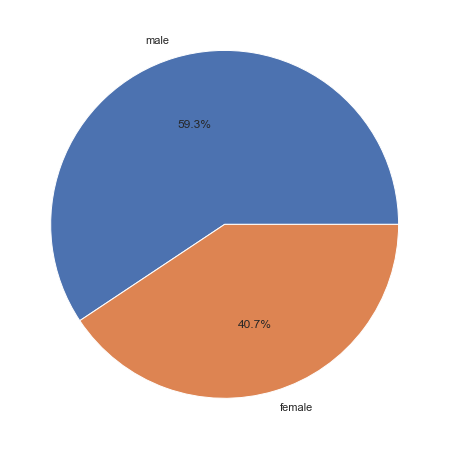

In [47]:
# Find genderwise user count %
gender_counts = df['gender'].value_counts()
plt.subplots(figsize=(10,8))
plt.pie(gender_counts, labels = ['male','female'], autopct='%1.1f%%')
plt.show()

In [48]:
df['gender'].value_counts()

0.0    58749
1.0    40254
Name: gender, dtype: int64

There are 59% male users and 41% female users.

#### Which category of gender has more friends?

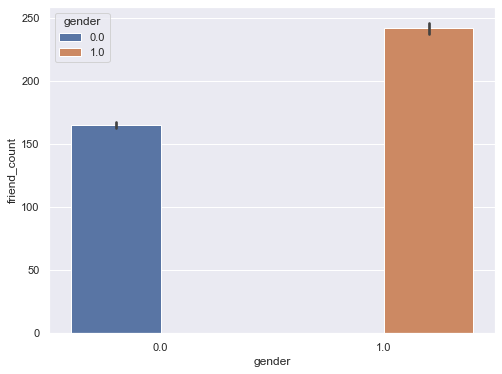

In [49]:
plt.subplots(figsize = (8,6))
sns.barplot(data = df,x = 'gender',y = 'friend_count', hue='gender')
plt.show()

According to the above graph, it can be observed that that the female users have more friends as compared to the male users.

#### Which category of gender initiated more friendships?

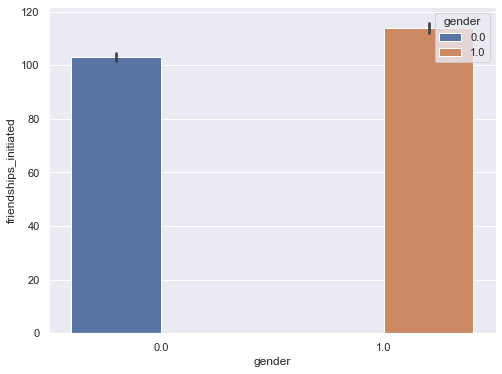

In [50]:
plt.subplots(figsize = (8,6))
sns.barplot(data = df,x = 'gender',y = 'friendships_initiated', hue='gender')
plt.show()

Females are having friends and friend request more than male. Also overall Female friends and request friend count is more than male across the population.

#### What is the distribution of tenure across different categories of gender?

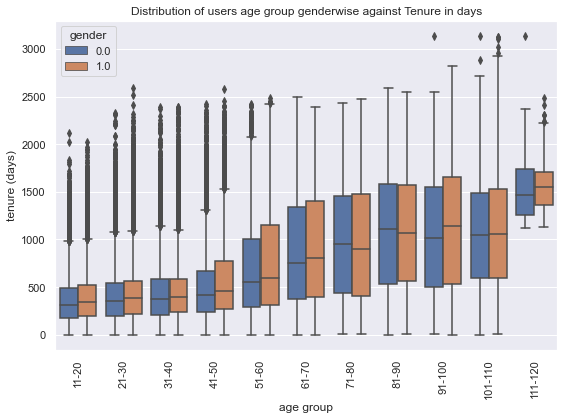

In [51]:
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x="age_group", y="tenure", hue="gender", data=df);
plt.setp(ax.get_xticklabels(), rotation=90)
plt.title("Distribution of users age group genderwise against Tenure in days")
plt.xlabel('age group');
plt.ylabel('tenure (days)');
plt.tight_layout()
plt.show()

Even though female user count is 41%, Female tenure is higher compare to male across all age group

## Analysis based on the least active users on Facebook

#### How many users have no friends?

In [55]:
labels = ['0-400', '401-800', '800-1200', '1201-1600', '1601-2000', '2001-2400', '2401-2800','2801-3200','3201-3600','3601-4000','4001-4400', '4401-4800','4801-5200']
df2['friend_count_group'] = pd.cut(df2.friend_count, [-1,400,800,1200,1600,2000,2400,2800,3200,3600,4000,4400,4800,5200], right=True, labels=labels)
print("Distinct Day values: {}".format(df2["friend_count_group"].unique()))

Distinct Day values: [0-400, 401-800, 800-1200, 1201-1600, 1601-2000, ..., 4001-4400, 2401-2800, 4801-5200, 4401-4800, 3201-3600]
Length: 13
Categories (13, object): [0-400 < 401-800 < 800-1200 < 1201-1600 ... 3601-4000 < 4001-4400 < 4401-4800 < 4801-5200]


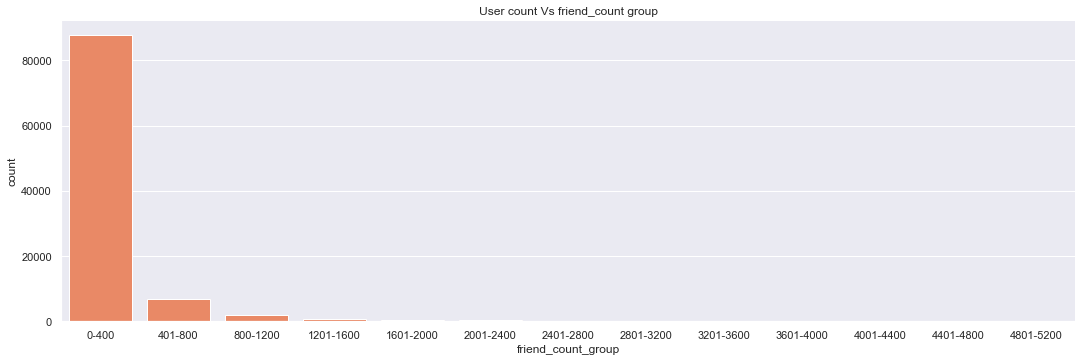

In [56]:
fig, ax = plt.subplots(figsize=(7,5))
sns.factorplot("friend_count_group", data=df2, aspect=3, kind="count", color='coral')
plt.setp(ax.get_xticklabels(), rotation=45)
plt.title("User count Vs friend_count group")
plt.close(1)

In [57]:
df['friend_count'].value_counts()

0       1962
1       1816
2       1117
3        860
5        789
        ... 
1808       1
1744       1
3729       1
1680       1
2047       1
Name: friend_count, Length: 2562, dtype: int64

There are 1962 users who do not have any friends.

#### How many users did not like any posts?

In [65]:
labels = ['1', '2', '3', '4','5', '6','7','8','9']
df2['tenure_group'] = pd.cut(df2.tenure, [-1,365,730,1095,1460,1825,2190,2555,2920,3285], right=True, labels=labels)
print("Tenure group distinct values: {}".format(df2["tenure_group"].unique()))

Tenure group distinct values: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Categories (9, object): [1 < 2 < 3 < 4 ... 6 < 7 < 8 < 9]


Text(0.5, 1.0, 'Tenure Yearwise Vs likes(G), mobile_likes(B) & www_likes(R)')

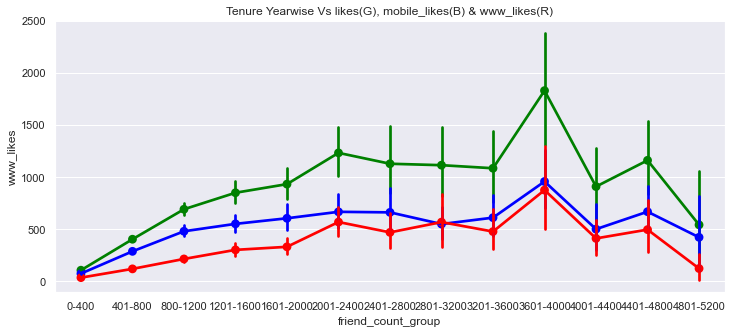

In [74]:
ig, ax = plt.subplots(figsize=(12,5))
#with sns.axes_style('white'):
g = sns.pointplot(x='friend_count_group', y='likes', labels="likes", data=df2,color='green',legend=True); 
g = sns.pointplot(x='friend_count_group', y='mobile_likes', data=df2,color='blue',lable='likes',legend=True); 
g = sns.pointplot(x='friend_count_group', y='www_likes', data=df2,color='red',lable='likes',legend=True);
plt.title('Tenure Yearwise Vs likes(G), mobile_likes(B) & www_likes(R)')

There are almost 400 people who did not like any post.

#### How many users did not receive any likes?

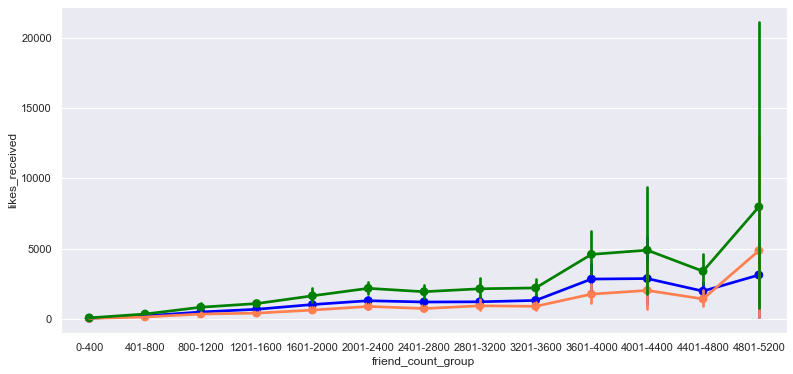

In [72]:
fig, ax = plt.subplots(figsize=(13,6))
sns.pointplot(x='friend_count_group', y='mobile_likes_received', data=df2,color='blue',lable='mobile_likes_received',legend=True); 
sns.pointplot(x='friend_count_group', y='www_likes_received', data=df2,color='coral',lable='www_likes_received',legend=True);
sns.pointplot(x='friend_count_group', y='likes_received', labels="likes_received", data=df2,color='green',legend=True);

There are approximatly 600-700 people who did not receive any likes.

## Analysis based on the user accessibility (Mobile Devices vs. Web Devices)

#### What is the average number of posts liked by users (based on gender) through web vs. mobile devices?

Text(0.5, 1.0, 'Tenure Yearwise Vs likes(G), mobile_likes(B) & www_likes(coral)')

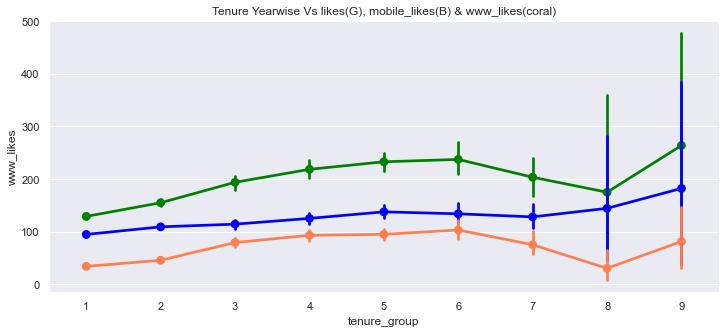

In [75]:
fig, ax = plt.subplots(figsize=(12,5))
#with sns.axes_style('white'):
g = sns.pointplot(x='tenure_group', y='likes', labels="likes", data=df2,color='green',legend=True); 
g = sns.pointplot(x='tenure_group', y='mobile_likes', data=df2,color='blue',lable='mobile_likes',legend=True); 
g = sns.pointplot(x='tenure_group', y='www_likes', data=df2,color='coral',lable='www_likes',legend=True);
plt.title('Tenure Yearwise Vs likes(G), mobile_likes(B) & www_likes(coral)')

#### What is the average number of likes received by users (based on gender) through web vs. mobile devices?

Text(0.5, 1.0, 'Tenure Yearwise Vs likes_received(G), mobile_likes_received(B) & www_likes_received(coral)')

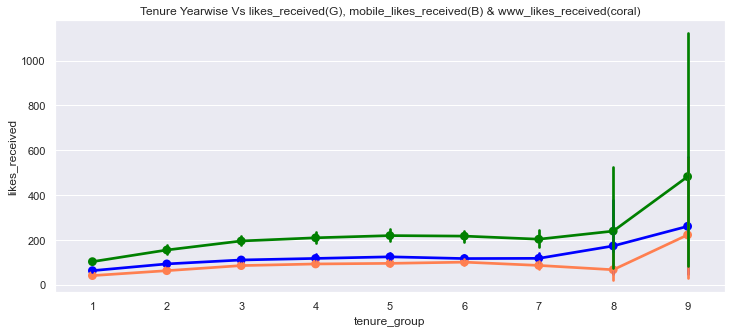

In [76]:
fig, ax = plt.subplots(figsize=(12,5))
#with sns.axes_style('white'):
sns.pointplot(x='tenure_group', y='mobile_likes_received', data=df2,color='blue',lable='mobile_likes_received',legend=True); 
sns.pointplot(x='tenure_group', y='www_likes_received', data=df2,color='coral',lable='www_likes_received',legend=True);
sns.pointplot(x='tenure_group', y='likes_received', labels="likes_received", data=df2,color='green',legend=True);
plt.title('Tenure Yearwise Vs likes_received(G), mobile_likes_received(B) & www_likes_received(coral)')

# Correlation  Matrix

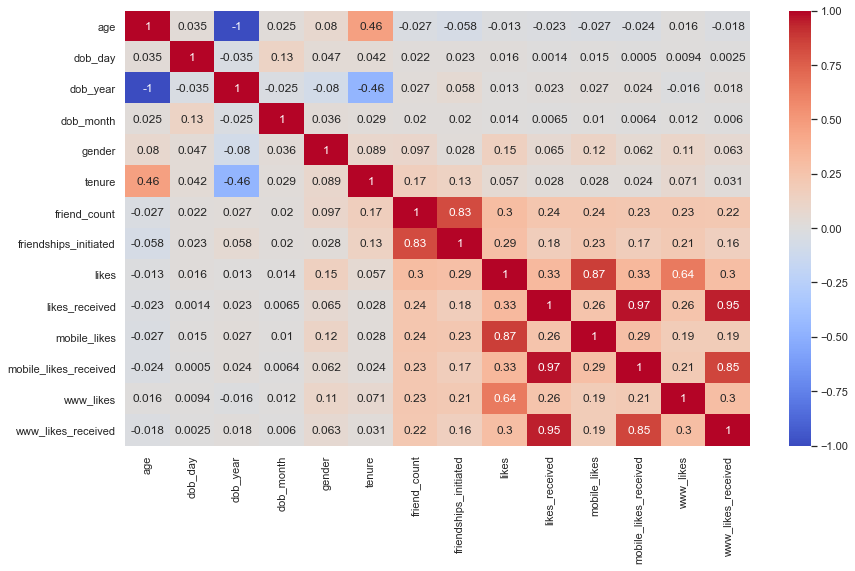

In [77]:
# Compute the correlation matrix
corr_df = df2.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 8))

# Draw a violinplot with a narrower bandwidth than the default
sns.heatmap(data=corr_df, annot = True, cmap='coolwarm')

sns.despine(left=True, bottom=True)

Varaible combination : 'likes' & 'mobile_likes', 'likes' & 'www_likes', 'likes_received' & 'mobile_likes_received', 'likes_received' & 'www_likes_received', 'www_likes_received' & 'mobile_likes_received', ('tenure', 'age' & 'dob_year') and 'friend_count' & 'friendships_initiated'.

The above combination shows how significant the correlation is between the above variables. This correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity occurs.

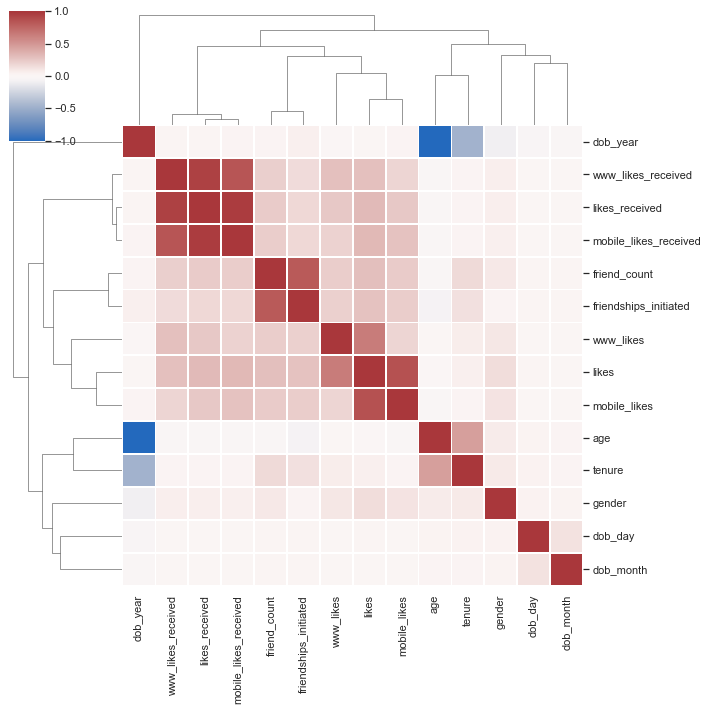

In [78]:
sns.clustermap(corr_df, center=0, cmap="vlag",linewidths=.75, figsize=(10, 10))

In [79]:
corr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14 entries, age to www_likes_received
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    14 non-null     float64
 1   dob_day                14 non-null     float64
 2   dob_year               14 non-null     float64
 3   dob_month              14 non-null     float64
 4   gender                 14 non-null     float64
 5   tenure                 14 non-null     float64
 6   friend_count           14 non-null     float64
 7   friendships_initiated  14 non-null     float64
 8   likes                  14 non-null     float64
 9   likes_received         14 non-null     float64
 10  mobile_likes           14 non-null     float64
 11  mobile_likes_received  14 non-null     float64
 12  www_likes              14 non-null     float64
 13  www_likes_received     14 non-null     float64
dtypes: float64(14)
memory usage: 1.6+ KB


Index(['age', 'tenure', 'gender', 'dob_day', 'dob_month', 'www_likes', 'likes',
       'www_likes_received', 'likes_received', 'mobile_likes_received',
       'mobile_likes', 'friend_count', 'friendships_initiated', 'dob_year'],
      dtype='object')


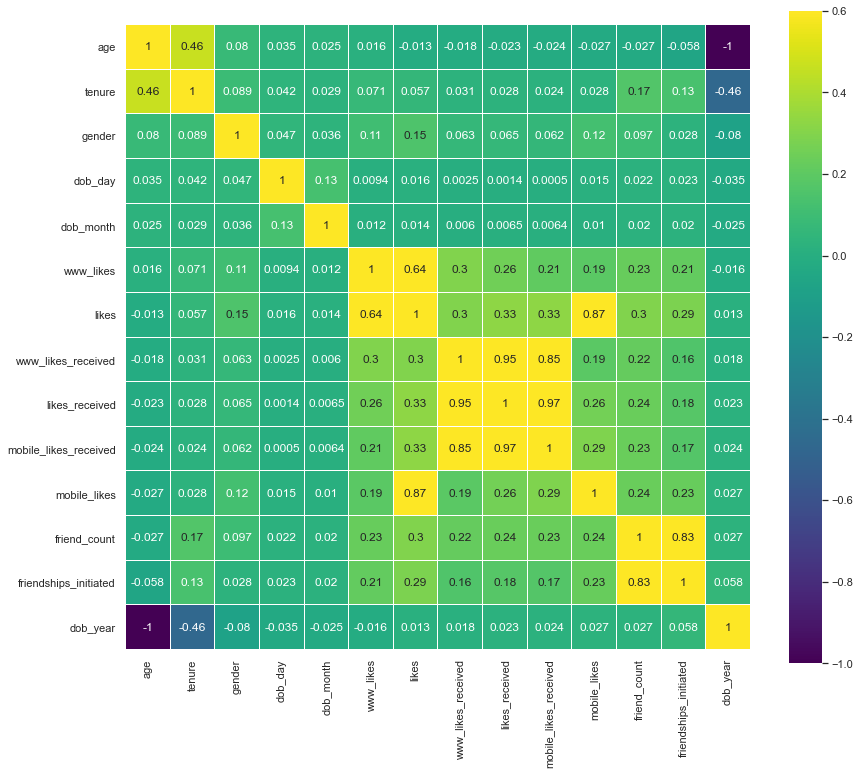

In [81]:
k= 14
cols = corr_df.nlargest(k,'age')['age'].index
print(cols)
cm = np.corrcoef(df2[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.6, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)


From Heatmap, zoomed heatmap and clustermap we can exclude high correlated columns to perform model analysis

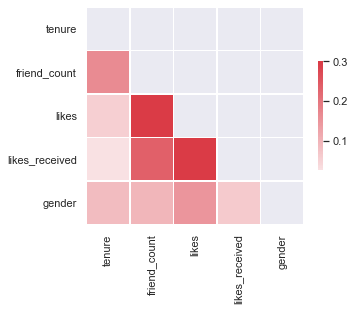

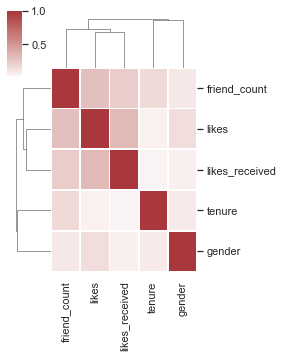

In [82]:
df3 = df2[['age','tenure', 'friend_count','likes','likes_received','gender']]
df3.set_index('age', inplace=True)
corr = df3.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 4))

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
g= sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

sns.clustermap(corr, center=0, cmap="vlag",linewidths=.75, figsize=(4, 5))

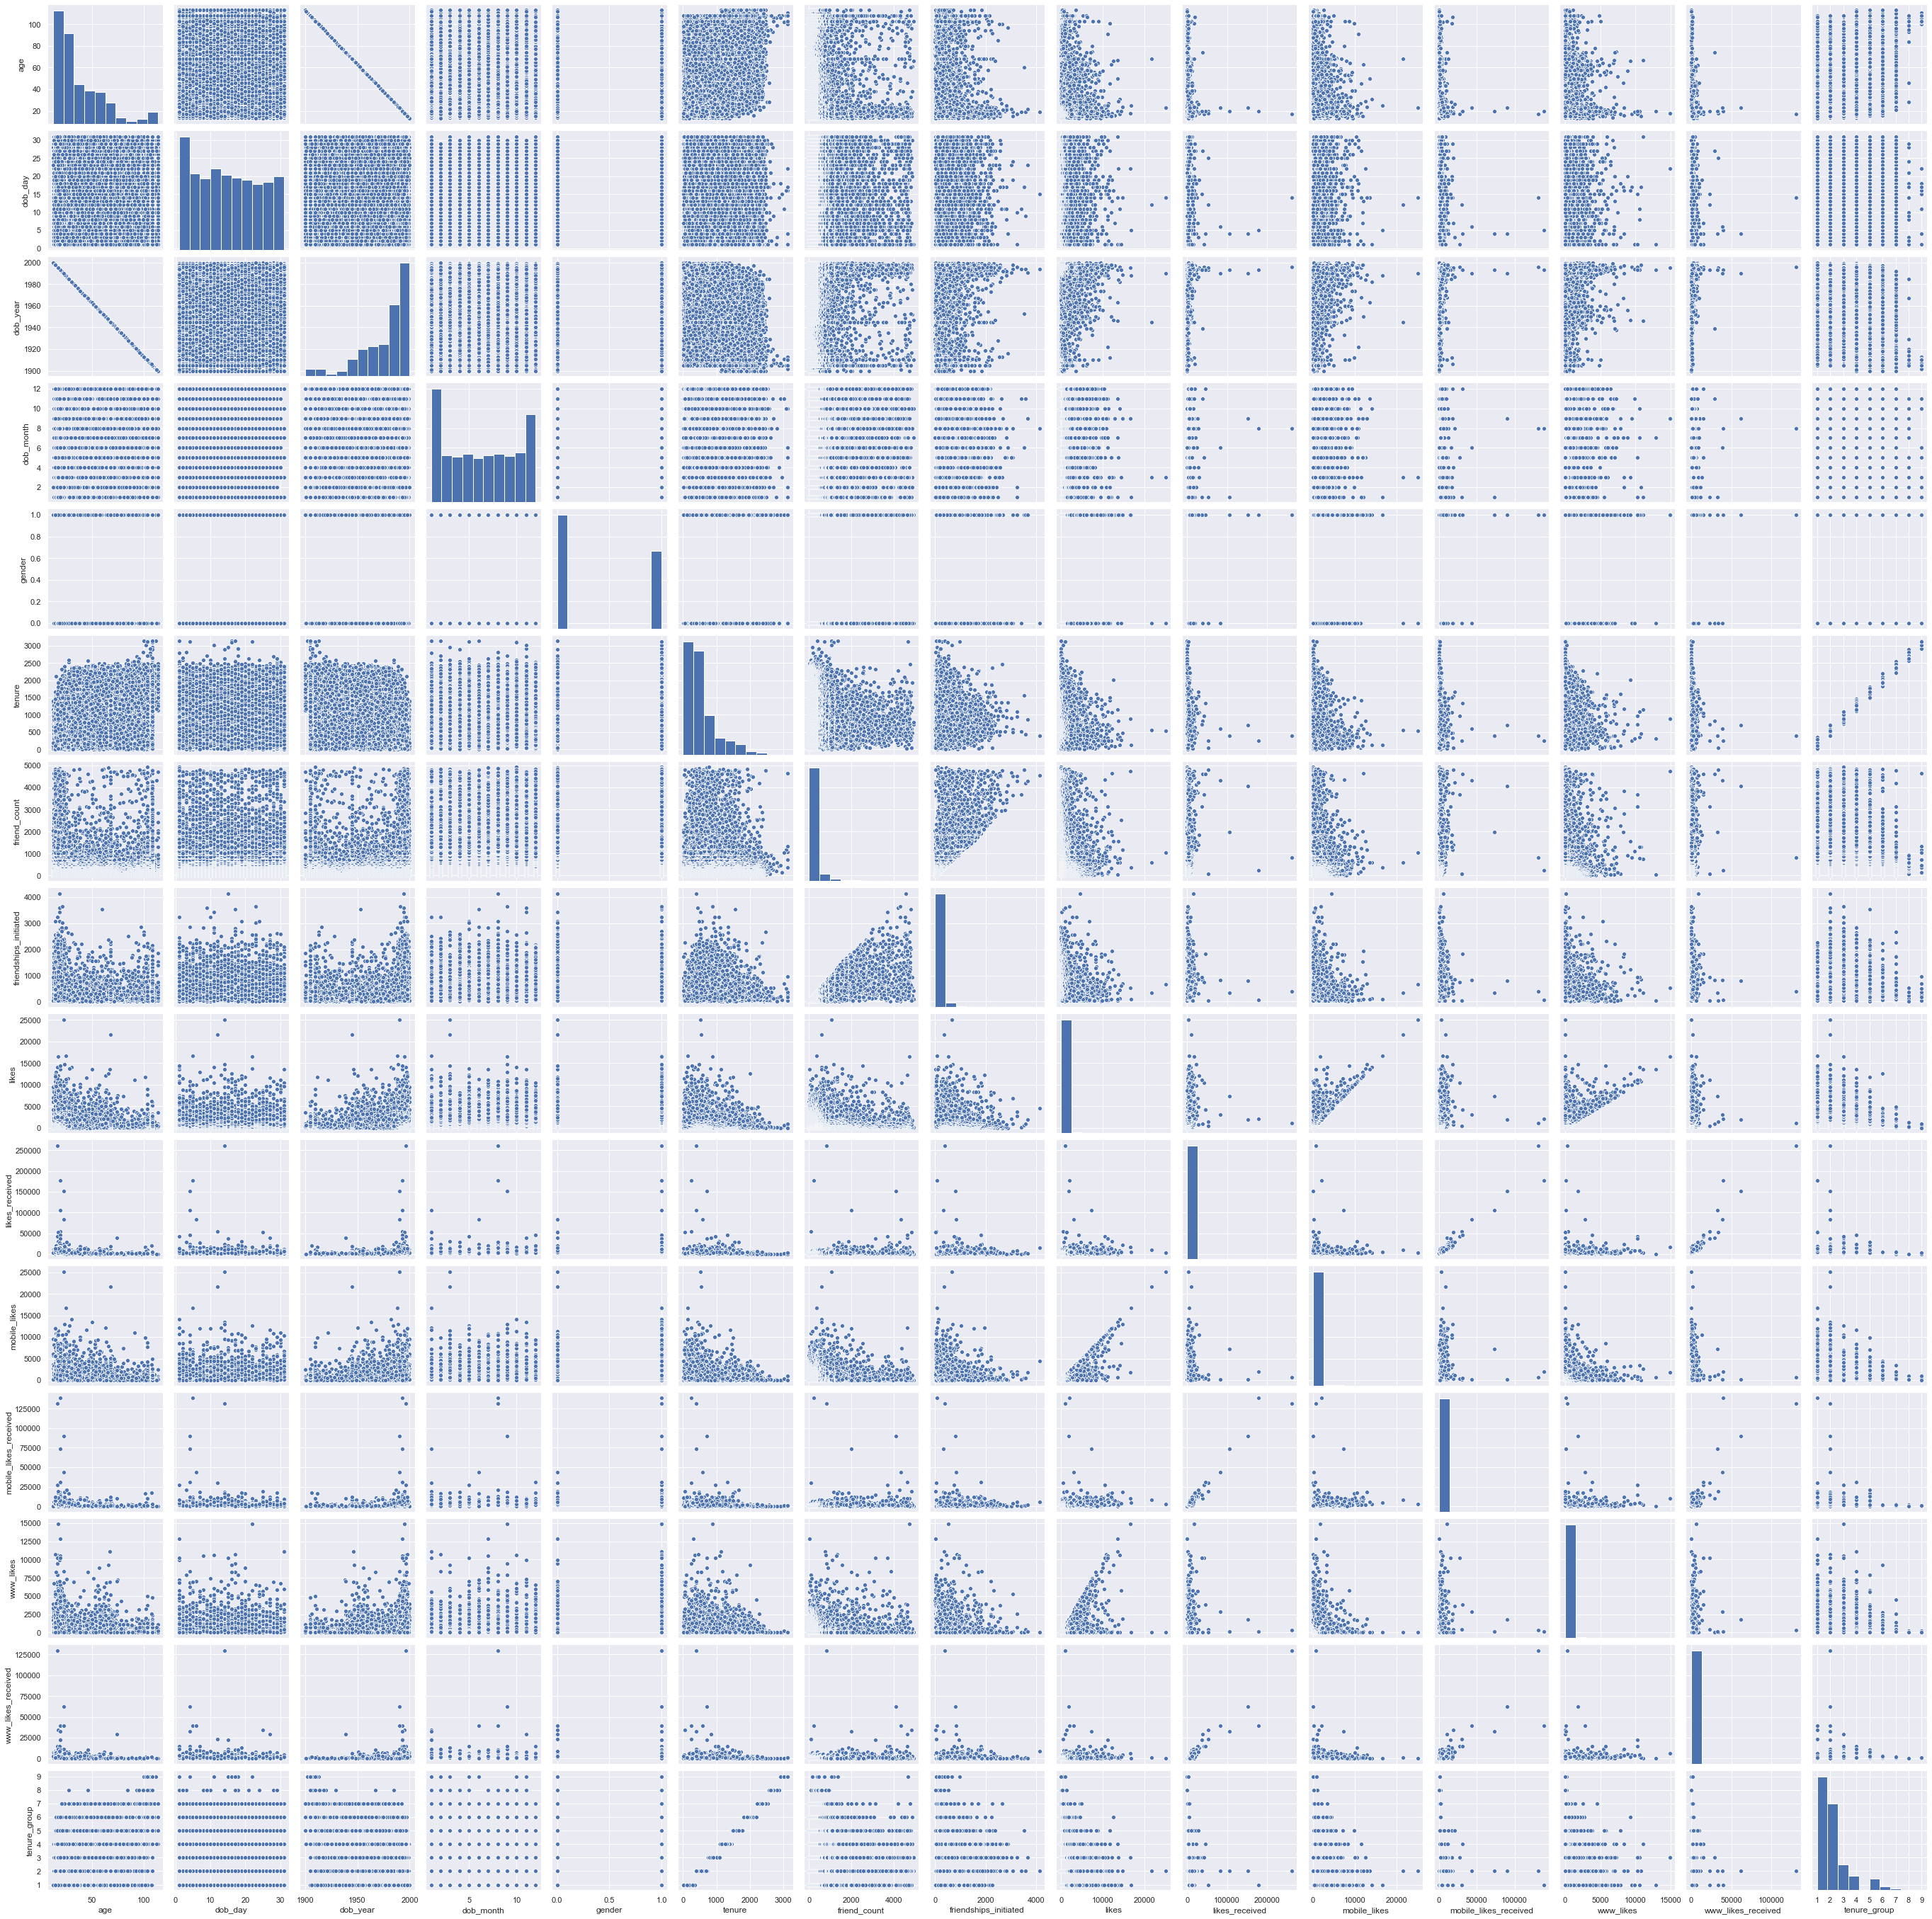

In [83]:
sns.pairplot(df2)

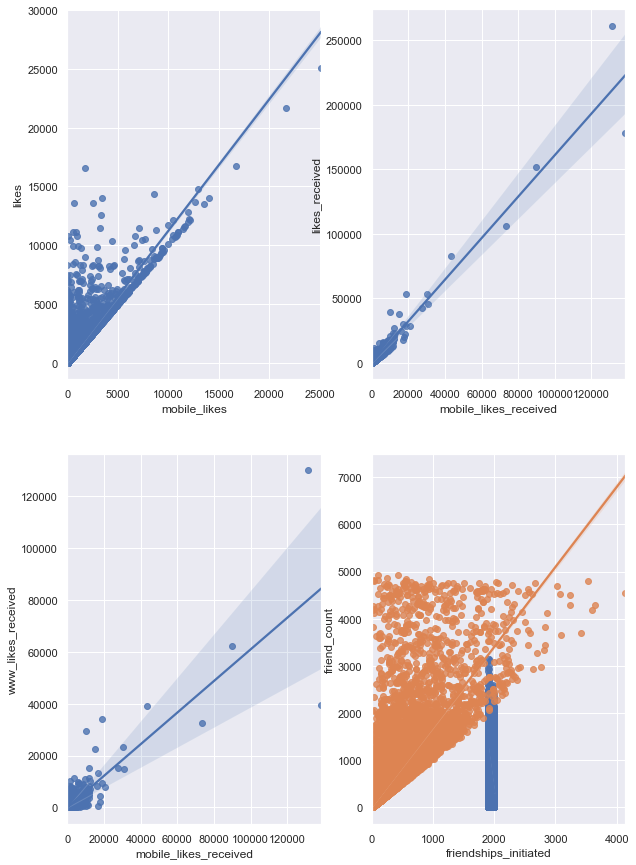

In [86]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,15))
scatter_plot = pd.concat([df2['likes'],df2['mobile_likes']],axis = 1)
sns.regplot(x='mobile_likes',y = 'likes',data = scatter_plot,scatter= True, fit_reg=True, ax=ax1)

scatter_plot = pd.concat([df2['likes_received'],df2['mobile_likes_received']],axis = 1)
sns.regplot(x='mobile_likes_received',y = 'likes_received',data = scatter_plot,scatter= True, fit_reg=True, ax=ax2)

scatter_plot = pd.concat([df2['www_likes_received'],df2['mobile_likes_received']],axis = 1)
sns.regplot(x='mobile_likes_received',y = 'www_likes_received',data = scatter_plot,scatter= True, fit_reg=True, ax=ax3)

scatter_plot = pd.concat([df2['tenure'],df2['dob_year']],axis = 1)
sns.regplot(x='dob_year',y = 'tenure',data = scatter_plot,scatter= True, fit_reg=True, ax=ax4)

scatter_plot = pd.concat([df2['friend_count'],df2['friendships_initiated']],axis = 1)
sns.regplot(x='friendships_initiated',y = 'friend_count',data = scatter_plot,scatter= True, fit_reg=True, ax=ax4)

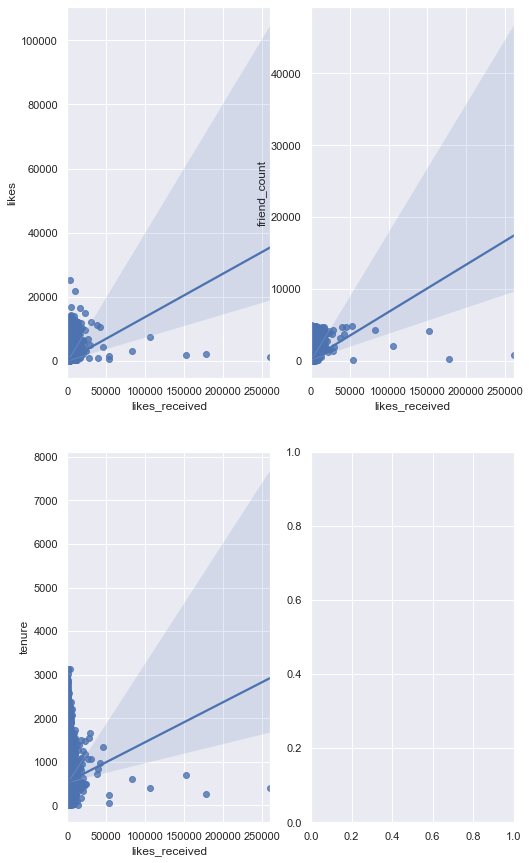

In [87]:
fig, ((ax6,ax7),(ax8,ax9)) = plt.subplots(nrows=2, ncols=2, figsize=(8,15))

scatter_plot = pd.concat([df2['likes'],df2['likes_received']],axis = 1)
sns.regplot(x='likes_received',y = 'likes',data = scatter_plot,scatter= True, fit_reg=True, ax=ax6)

scatter_plot = pd.concat([df2['friend_count'],df2['likes_received']],axis = 1)
sns.regplot(x='likes_received',y = 'friend_count',data = scatter_plot,scatter= True, fit_reg=True, ax=ax7)

scatter_plot = pd.concat([df2['tenure'],df2['likes_received']],axis = 1)
sns.regplot(x='likes_received',y = 'tenure',data = scatter_plot,scatter= True, fit_reg=True, ax=ax8)